---
**Introduction to Numerical Shooting**

Week 15 of EMAT30008

https://engmaths.github.io/emat30008/odes/numericalshooting/ 

(See week15funcs.py for associated functions)

Author: Ben Winstanley, yy23737@bristol.ac.uk

---

In [2]:
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt
import os
import time

# Move to parent directory, then w14, import, change back
# TODO: make this importing less hard coded to folder names
os.chdir(os.path.pardir)
os.chdir("Week 14")
from week14funcs import euler_step, solve_to 
os.chdir(os.path.pardir)
os.chdir("Week 15")


-------
*Simulating Predator Prey Equations*

$ \frac{dx}{dt} = x(1-x) - \frac{axy}{d+x} $

$ \frac{dy}{dt} = by(1 - \frac{y}{x}) $

set a = 1, d = 0.1, b $\in [0.1,0.5]$

We'll choose x=1,y=1 as initial conditions

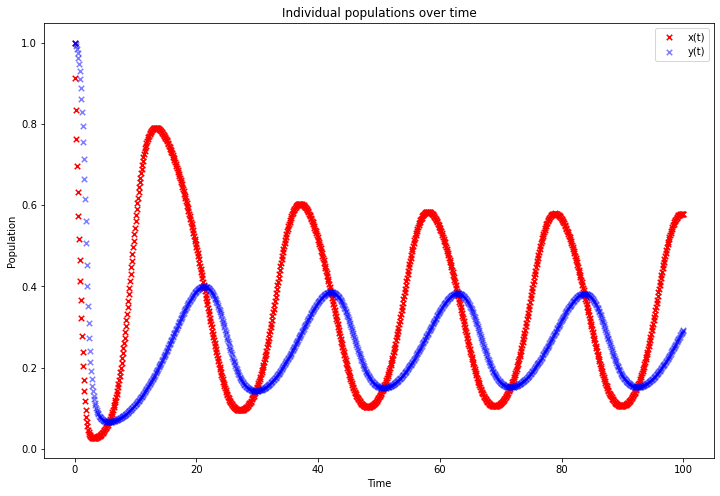

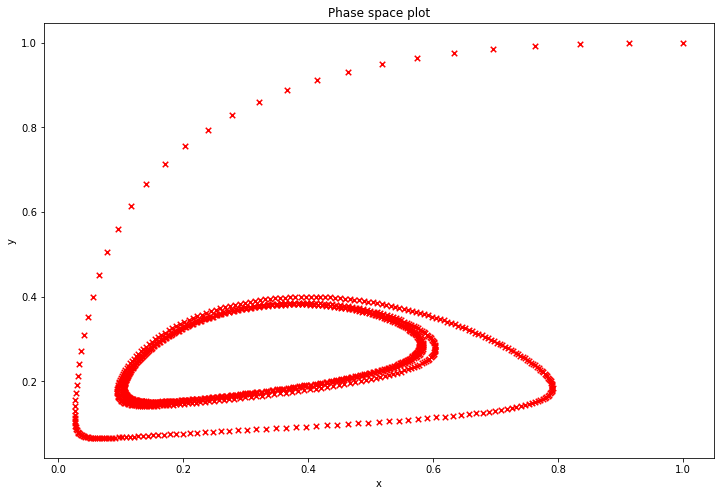

In [6]:
# Define ODE function f(x,t)
def predator_prey(x: np.ndarray, t: float):
    '''
    Defines RHS for Predator Prey system
    '''
    # Define constants inside function for now
    a = 1
    d = 0.1
    b =0.2

    dxdt = x[0]*(1-x[0]) - (a*x[0]*x[1])/(d+x[0])
    dydt = b*x[1]*(1-(x[1]/x[0]))
    return np.array((dxdt, dydt))

# Calling solve_to with RK4 method
x_init = np.array((1,1))
solution = solve_to(predator_prey, x_init, 0, 100, 0.1, 'RK4')

plt.figure(figsize=[12,8])
plt.scatter(solution[:,0], solution[:,1], c='r', marker='x', s=30, label='x(t)')
plt.scatter(solution[:,0], solution[:,2], c='b', marker='x', s=30,label='y(t)', alpha=0.5)
plt.legend()
plt.title("Individual populations over time")
plt.xlabel("Time")
plt.ylabel("Population")
plt.show()

plt.figure(figsize=[12,8])
plt.scatter(solution[:,1], solution[:,2], c='r', marker='x', s=30)
plt.title("Phase space plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()